<a href="https://colab.research.google.com/github/mngugi/DS_Collections/blob/main/Yoro_vs_Man_united_Center_Backs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

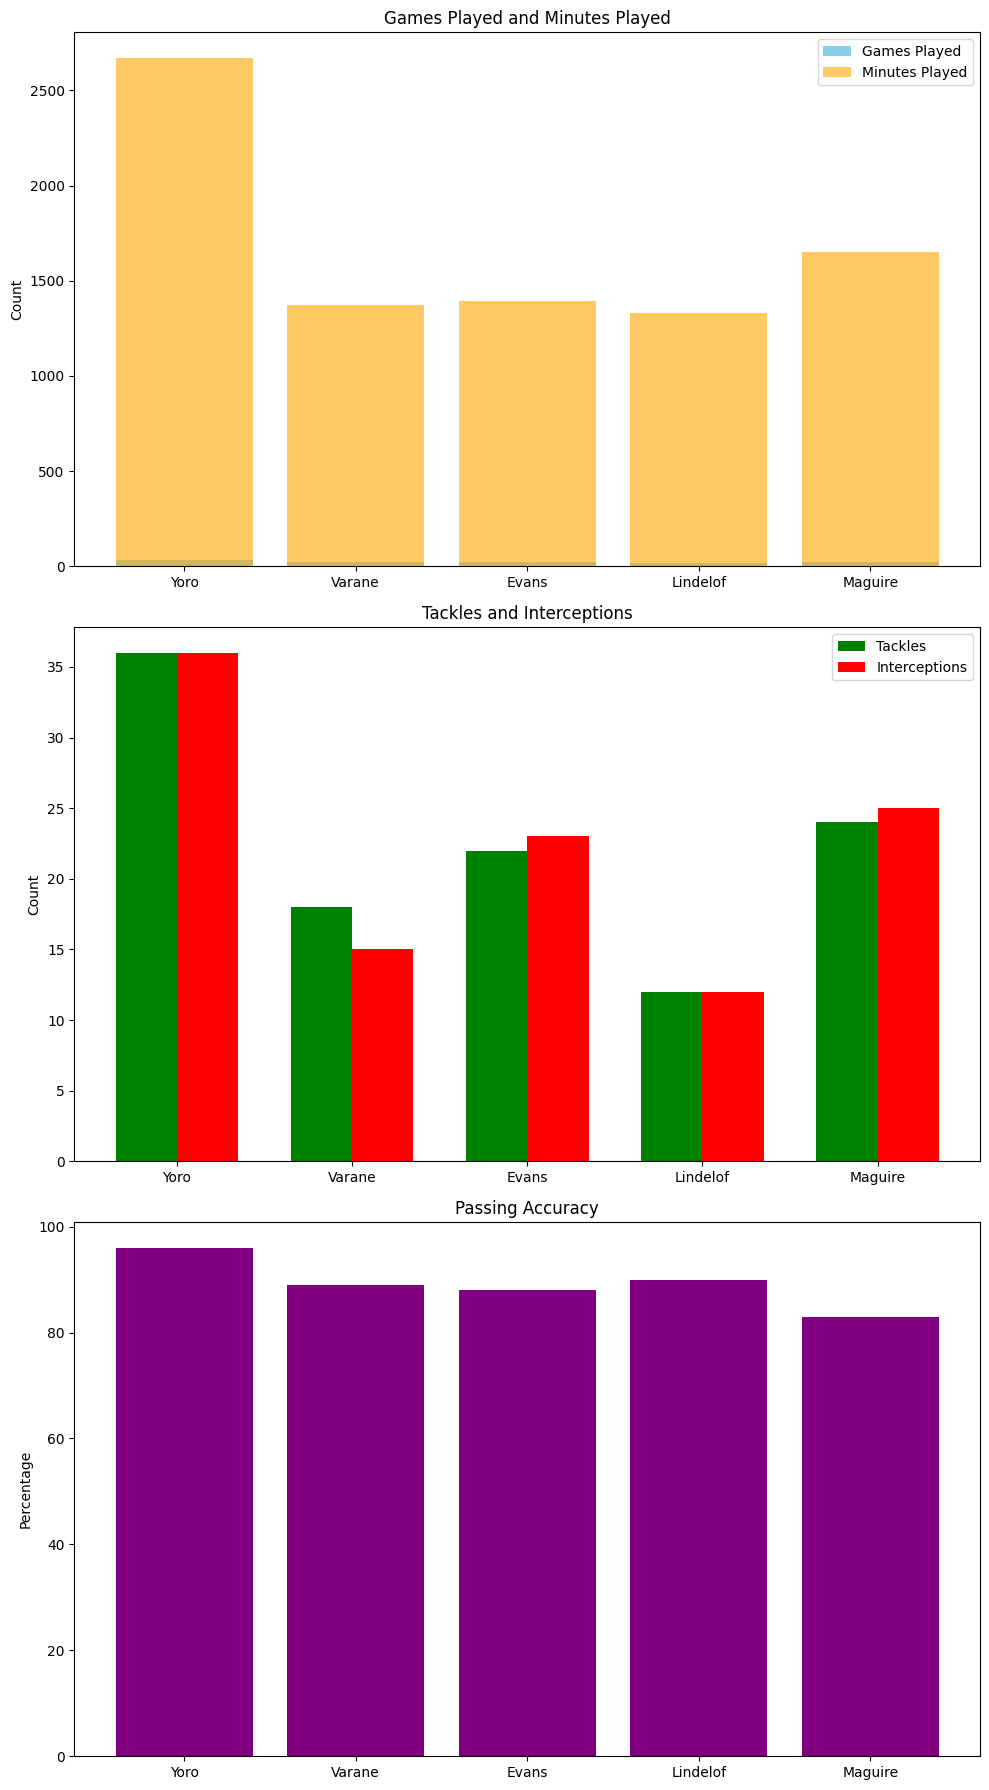

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Player data
players = ["Yoro", "Varane", "Evans", "Lindelof", "Maguire"]
games = [32, 22, 23, 19, 22]
minutes_played = [2672, 1371, 1396, 1332, 1650]
tackles = [36, 18, 22, 12, 24]
interceptions = [36, 15, 23, 12, 25]
passing_accuracy = [96.00, 89.00, 88.00, 90.00, 83.00]

# Plotting games and minutes played
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

axs[0].bar(players, games, color='skyblue', label='Games Played')
axs[0].bar(players, minutes_played, color='orange', label='Minutes Played', alpha=0.6)
axs[0].set_title('Games Played and Minutes Played')
axs[0].set_ylabel('Count')
axs[0].legend()

# Plotting tackles and interceptions
bar_width = 0.35
index = np.arange(len(players))

axs[1].bar(index, tackles, bar_width, label='Tackles', color='green')
axs[1].bar(index + bar_width, interceptions, bar_width, label='Interceptions', color='red')
axs[1].set_title('Tackles and Interceptions')
axs[1].set_ylabel('Count')
axs[1].set_xticks(index + bar_width / 2)
axs[1].set_xticklabels(players)
axs[1].legend()

# Plotting passing accuracy
axs[2].bar(players, passing_accuracy, color='purple')
axs[2].set_title('Passing Accuracy')
axs[2].set_ylabel('Percentage')

# Adjust layout
plt.tight_layout()
plt.show()


In [2]:
import pandas as pd
from scipy.stats import zscore

# Creating a DataFrame
data = {
    "Player Name": ["Yoro", "Varane", "Evans", "Lindelof", "Maguire"],
    "Games": [32, 22, 23, 19, 22],
    "Minutes Played": [2672, 1371, 1396, 1332, 1650],
    "Tackles": [36, 18, 22, 12, 24],
    "Interceptions": [36, 15, 23, 12, 25],
    "Passing Accuracy": [96.00, 89.00, 88.00, 90.00, 83.00]
}

df = pd.DataFrame(data)

# Calculating Z-scores
df_zscores = df.iloc[:, 1:].apply(zscore)
df_zscores['Player Name'] = df['Player Name']
df_zscores = df_zscores.set_index('Player Name')

# Finding anomalies with Z-score > 2 or < -2
anomalies_zscore = df_zscores[(df_zscores > 2) | (df_zscores < -2)].dropna(how='all')

# Calculating IQR for each column
Q1 = df.iloc[:, 1:].quantile(0.25)
Q3 = df.iloc[:, 1:].quantile(0.75)
IQR = Q3 - Q1

# Finding anomalies outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]
anomalies_iqr = df[((df.iloc[:, 1:] < (Q1 - 1.5 * IQR)) | (df.iloc[:, 1:] > (Q3 + 1.5 * IQR))).any(axis=1)]

anomalies_zscore, anomalies_iqr


(Empty DataFrame
 Columns: [Games, Minutes Played, Tackles, Interceptions, Passing Accuracy]
 Index: [],
   Player Name  Games  Minutes Played  Tackles  Interceptions  Passing Accuracy
 0        Yoro     32            2672       36             36              96.0
 3    Lindelof     19            1332       12             12              90.0
 4     Maguire     22            1650       24             25              83.0)